In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


- ## datetime 
    -  날짜 + 시간
    
- ## season 
    - 1 = 봄
    - 2 = 여름 
    - 3 = 가을 
    - 4 = 겨울
- ## holiday
    - 휴일여부를 0,1로 구분
- ## workingday
    - 일하는날 (휴일과 주말x)
- ## weather
    - 1: 맑음~ 약간흐림까지의 범위
    - 2: 안개낀 흐림
    - 3: 약한 정도의 눈, 비등 자연현상
    - 4: 강한 정도의 자연현상
- ## temp 
    - 섭시 온도
- ##  atemp 
    - 체감온도 
- ## humidity 
    - 상대 습도
- ## windspeed
    - 풍속
- ## casual 
    - 예약하지 않은 고객
- ## registered 
    - 미리 예약한 고객
- ## count 
    - 총 고객 대여수  [count = casual + registered]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


- casual,registered,count변수는 train set에만 존재함
- 결측치는 존재하지 않고 train set은 10886개, test set에는 6493개가 있다.
- 대부분의 칼럼이 int와 float type이다.

- datetime 변수는 object형식이므로 pandas에 to_datetime를 이용해서 datetime형식으로 바꿔준다.

In [7]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


- 이제 datetime변수를 year, month, day, hour, dayofweek 변수를 추가하여 나눈다.

In [9]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.day_name()


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.day_name()

In [10]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,Wednesday


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [12]:
print(train.info())
print('**'*30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  dayofweek   10886 non-

- train set에서 12개의 칼럼이 17개의 칼럼으로 바뀐 모습을 볼 수 있다.
- test set에서 9개의 칼럼이 14개의 칼럼으로 바뀐 모습을 볼 수 있다.

## EDA & Feature Engineering

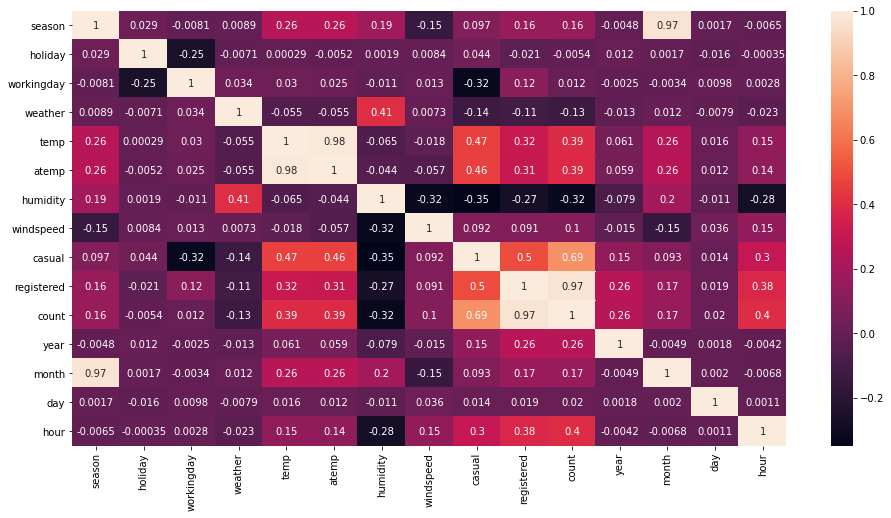

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True)
plt.show()


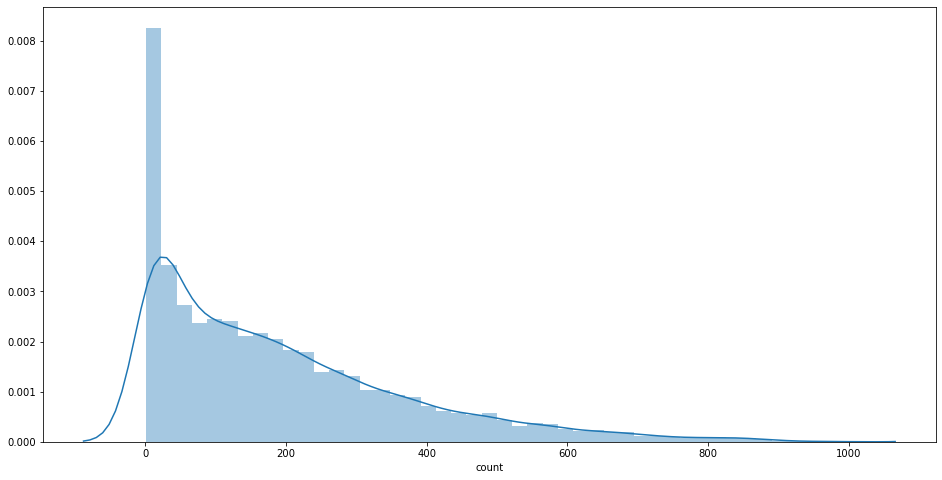

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(train['count'])
plt.show()

In [15]:
def scatter_plot():
    for i in test.columns:
        plt.scatter(train[i],train['count'])
        plt.title(f"Scatter plot for {i}")
        plt.show()

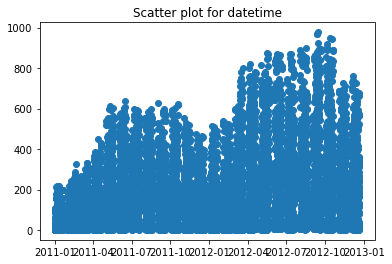

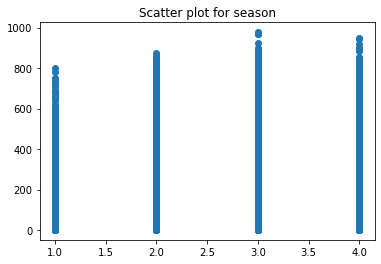

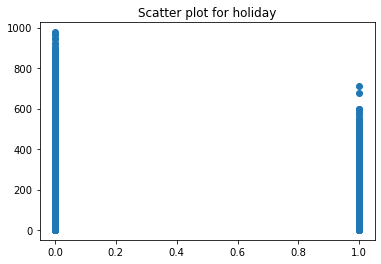

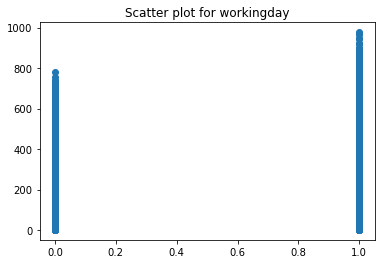

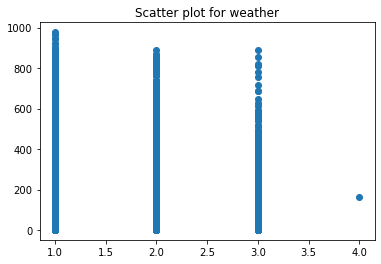

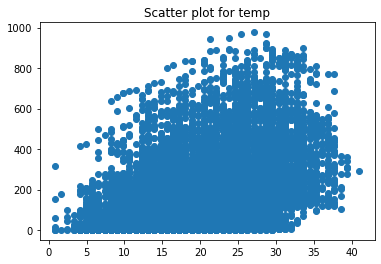

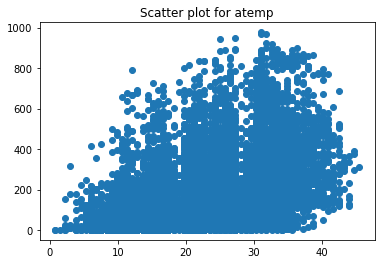

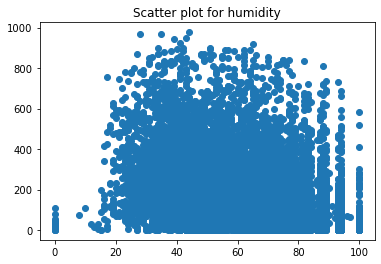

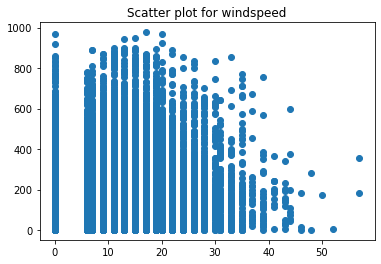

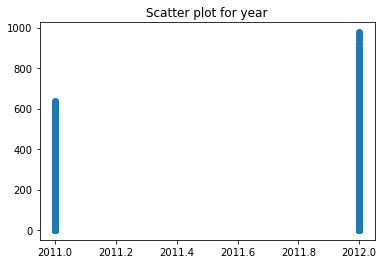

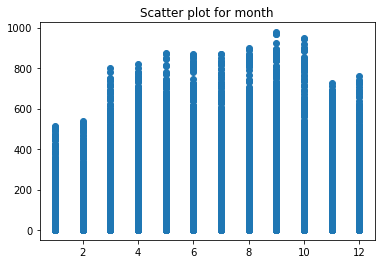

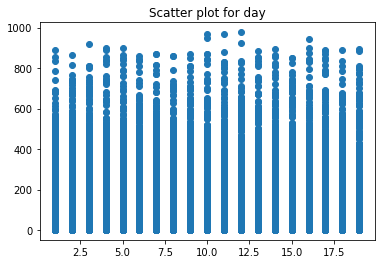

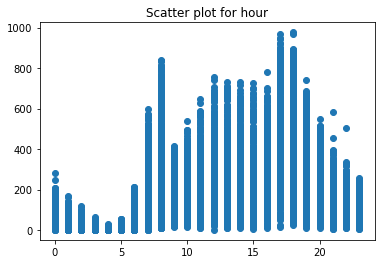

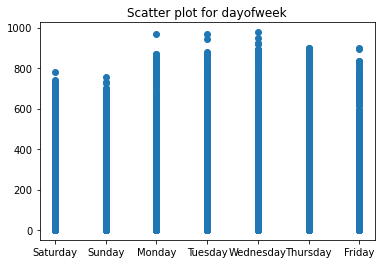

In [16]:
scatter_plot()

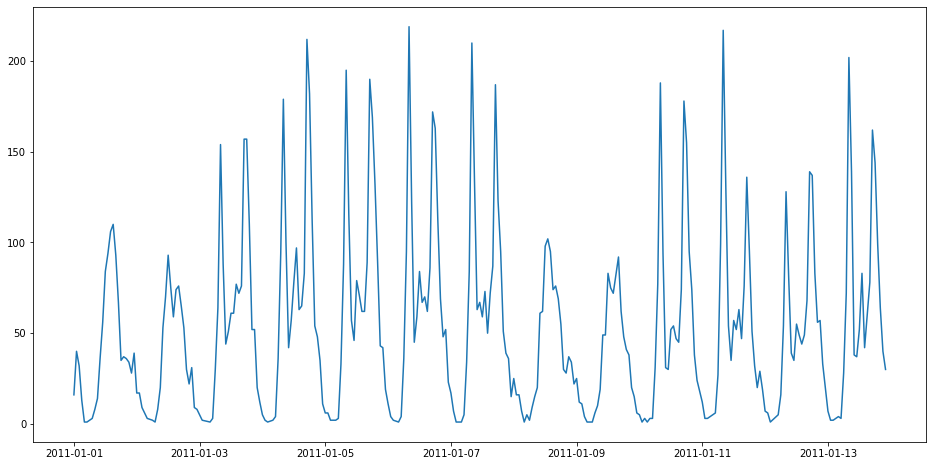

In [17]:
plt.figure(figsize=(16,8))
plt.plot(train.set_index('datetime')["count"][0:300])
plt.show()

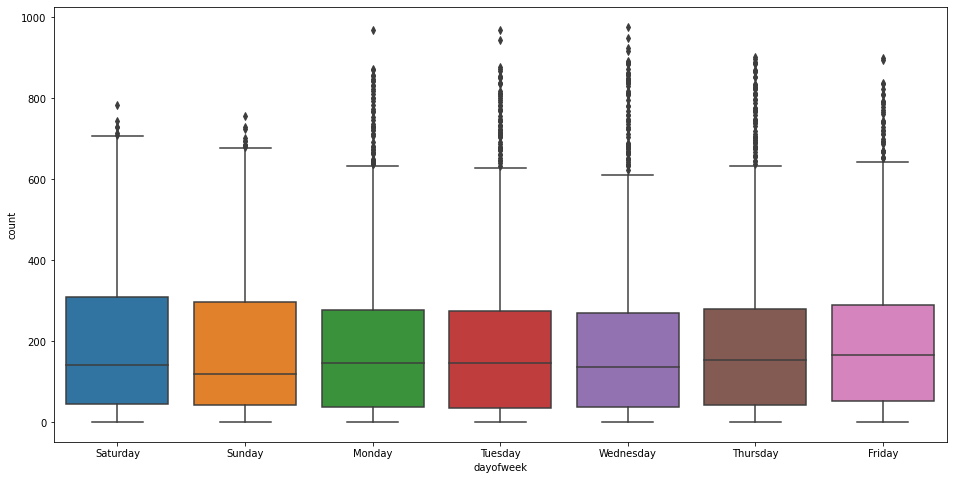

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(x='dayofweek',y='count', data=train)

- 위 그래프는 요일에 따른 대여량을 나타낸 그래프이다.

- 범주형 데이터를 서수형 데이터로 변환하자.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['dayofweek'] = le.fit_transform(train['dayofweek'])
test['dayofweek'] = le.transform(test['dayofweek'])

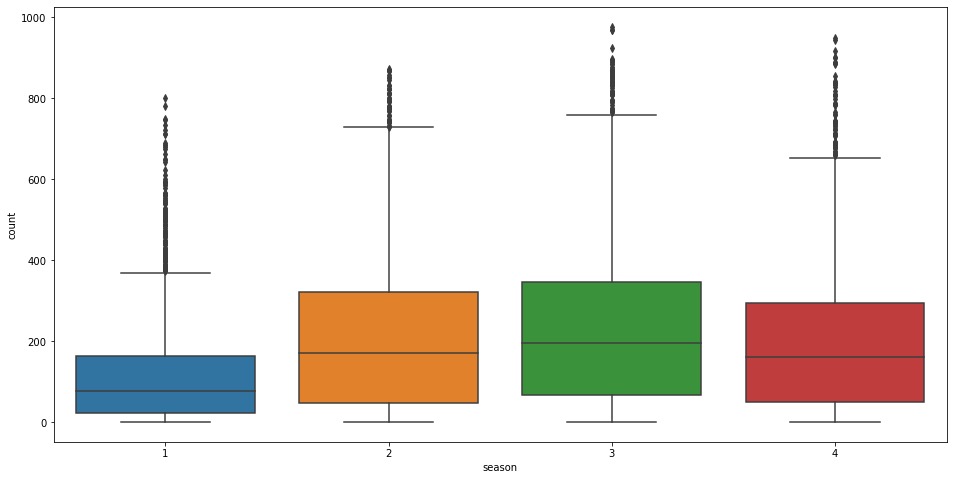

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='count', data=train)

- 여름과 가을에 대여량이 많다.

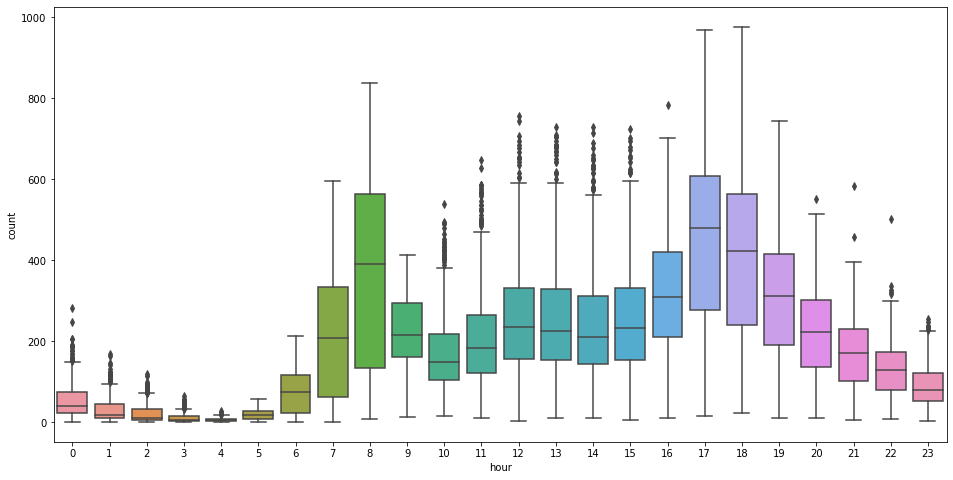

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(x='hour',y='count', data=train)

- 시간에 따른 그래프인데 눈에 띄게 대여량 차이가 있다. hour변수 사용하자
    - 아침과 저녁에 대여량이 많은데 이는 출근시간과 퇴근시간 전후로 보인다.

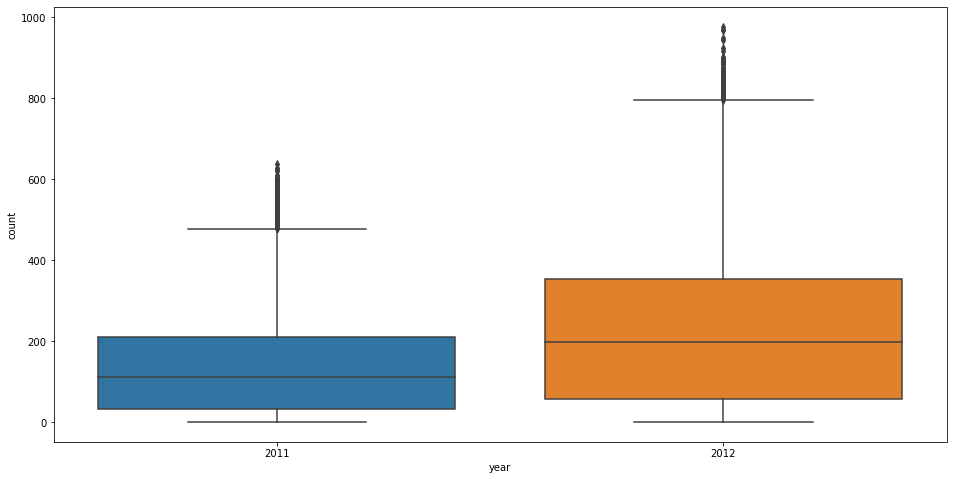

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x='year',y='count', data=train)

(array([1767.,  939.,  975.,  627.,  394.,  328.,  214.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

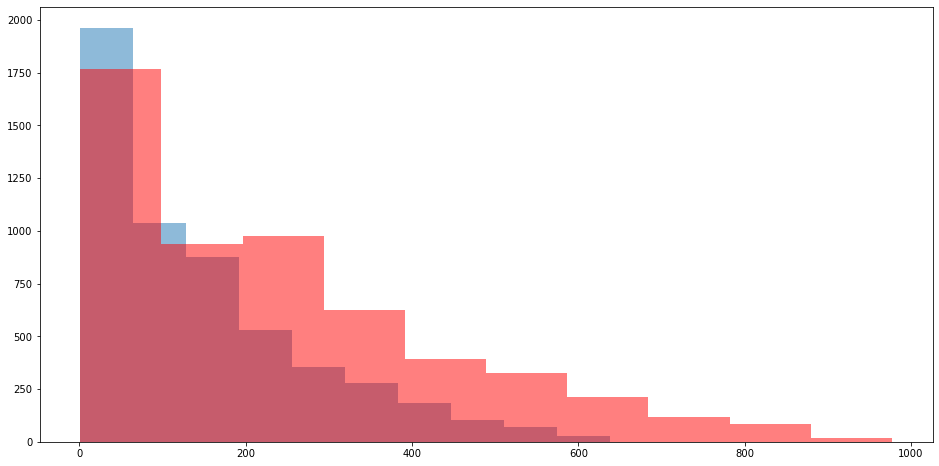

In [23]:
plt.figure(figsize=(16,8))
plt.hist(train['count'][train['year'] == 2011], alpha=0.5, label='2011')
plt.hist(train['count'][train['year'] == 2012], alpha=0.5, label='2012', color='red')

- 위 두개의 그래프를 보면 2011년 보다 2012년의 대여량이 더욱 많음을 알수있다.

### 이상치 찾기

In [24]:
train.set_index('datetime', inplace=True)

In [25]:
train['2011-01-19 23:00:00':]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28,2011,1,19,23,6
2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,2011,2,1,0,5
2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,2011,2,1,1,5
2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,2,5
2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,6
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,6
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,6


### 분위수(Quantile)
- 자료 크기 순서에 따른 위치값
- 정규분포를크게 벗어나거나, 산포가 큰 상황에서 분위수가 대푯값으로 사용됨

In [26]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
year            1.0000
month           6.0000
day            10.0000
hour           12.0000
dayofweek       4.0000
dtype: float64


In [27]:
train_without_outliers =train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
train_without_outliers.dropna(inplace=True)

<ipython-input-28-9327b2dc4bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers.dropna(inplace=True)


In [30]:
print(train.info())
print('*'*50)
print(train_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  dayofweek   10886 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 1.6 MB
None
**************************************************
<

In [31]:
train_without_outliers.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,2
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,2


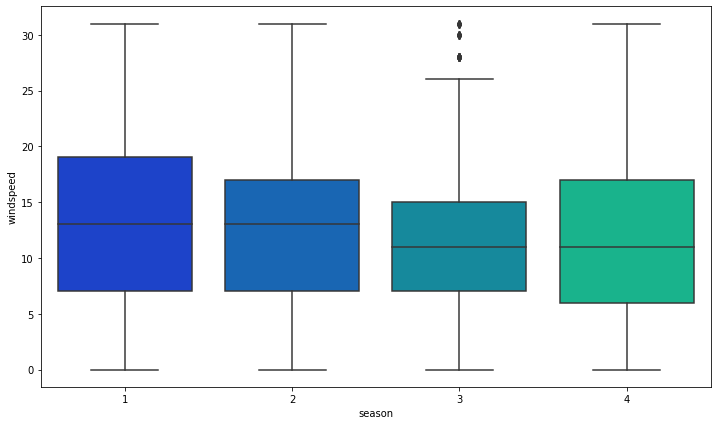

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season',y='windspeed',data=train_without_outliers,palette='winter')

In [33]:
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].replace(0,np.NaN)
test['windspeed'] = test['windspeed'].replace(0,np.NaN) 

<ipython-input-33-8f99b828ad02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers['windspeed'] = train_without_outliers['windspeed'].replace(0,np.NaN)


In [34]:
train_without_outliers['windspeed'].fillna(method='bfill',inplace=True)
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].interpolate()
test['windspeed'] = test['windspeed'].interpolate()

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-34-fbef9fb5ac29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_without_outliers['windspeed'] = train_without_outliers['windspeed'].interpolate()


In [35]:
train_without_outliers['windspeed'].isnull().sum()

0

In [36]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,21.002267,2011,1,20,1,4
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,16.001833,2011,1,20,2,4
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4


In [37]:
train_without_outliers.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,2
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,2
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,2
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,2


In [38]:
train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')
test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9263 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      9263 non-null   category
 1   holiday     9263 non-null   category
 2   workingday  9263 non-null   category
 3   weather     9263 non-null   category
 4   temp        9263 non-null   float64 
 5   atemp       9263 non-null   float64 
 6   humidity    9263 non-null   int64   
 7   windspeed   9263 non-null   float64 
 8   casual      9263 non-null   int64   
 9   registered  9263 non-null   int64   
 10  count       9263 non-null   int64   
 11  year        9263 non-null   category
 12  month       9263 non-null   category
 13  day         9263 non-null   category
 14  hour        9263 non-null   category
 15  dayofweek   9263 non-null   category
dtypes: category(9), float64(3), int64(4)
memory usage: 663.2 KB


## Predict
#### Random Forest Regression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = train_without_outliers[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']]
y = train_without_outliers['count']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [43]:
y_train

datetime
2012-06-09 08:00:00    244
2011-05-17 18:00:00    480
2012-01-09 01:00:00      5
2012-08-11 02:00:00     85
2012-04-01 02:00:00     81
                      ... 
2012-04-13 09:00:00    330
2011-06-19 18:00:00    296
2011-10-14 05:00:00     17
2012-07-15 04:00:00     19
2011-01-08 00:00:00     25
Name: count, Length: 8336, dtype: int64

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
rf_prediction = rf.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

RMSE: 33.23517909134971


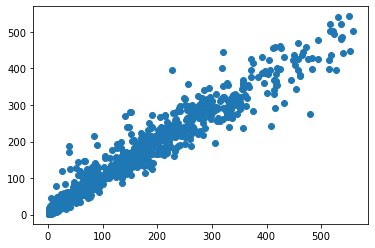

In [48]:
plt.scatter(y_test,rf_prediction)

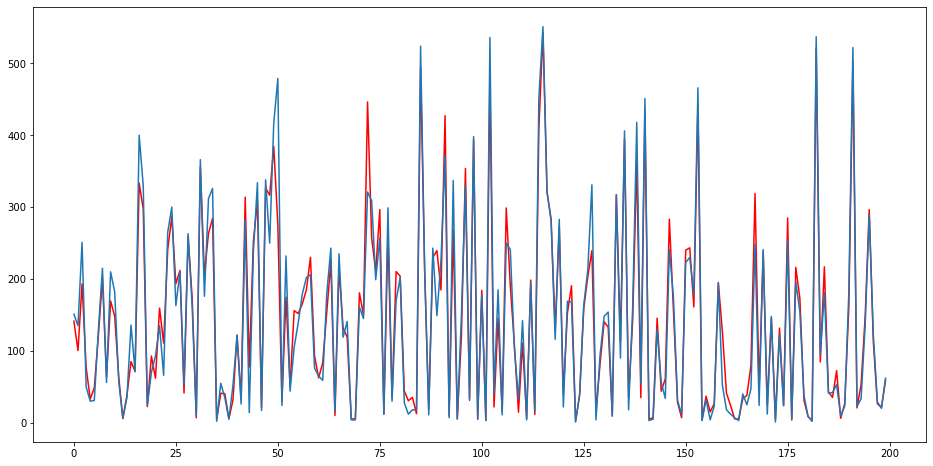

In [49]:
plt.figure(figsize=(16,8))
plt.plot(rf_prediction[0:200],'r')
plt.plot(y_test[0:200].values)

### Decision Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
dt_prediction = dt_reg.predict(X_test)

In [52]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_prediction)))

RMSE: 47.94962072104784


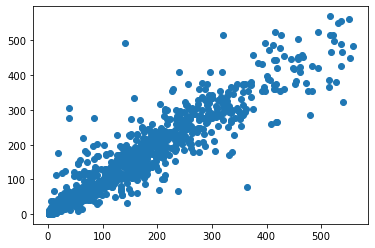

In [53]:
plt.scatter(y_test,dt_prediction)

### Use Test Data

In [54]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,21.002267,2011,1,20,1,4
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,16.001833,2011,1,20,2,4
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4


In [55]:
test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']] = sc_X.fit_transform(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']])

In [56]:
test_pred= rf.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']])

In [57]:
test_pred

array([  8.1 ,   4.58,   6.61, ..., 164.53, 124.33,  83.12])

In [58]:
test_pred=test_pred.reshape(-1,1)

In [59]:
test_pred = pd.DataFrame(test_pred, columns=['count'])

In [60]:
df = pd.concat([test['datetime'], test_pred],axis=1)

In [61]:
df.head()

,datetime,count
0,2011-01-20 00:00:00,8.10
1,2011-01-20 01:00:00,4.58
2,2011-01-20 02:00:00,6.61
3,2011-01-20 03:00:00,2.98
4,2011-01-20 04:00:00,2.56


In [62]:
df['count'] = df['count'].astype('int')

In [63]:
df.to_csv('submission1.csv' , index=False)